# Welcome to our Decision Trees Workshop!

In our previous workshop, we learned logistic regression, a strong classification algorithm that makes use of `sigmoid` function to predict the class to which the objects belong. Now, we are going to learn a new classification algorithm called `Decision Tree`. Decision trees are flowchart structures that resemble a tree, where an internal node  represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. Let's learn a bit more about tree data structure to have a better understanding of decision trees.

### Trees

![trees](https://miro.medium.com/v2/resize:fit:1400/0*PZLEPHbPoQVWpEXi)

Trees are data structures that are very similar to real-life trees, only difference being the position of the root and the leaves. In tree data structures, `root` node is the start node, and nodes can have different amount of children. Nodes that have no children are called `leaves`.

### Decision Trees

Very similar to the previously defined trees, the topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![dec-tree](https://miro.medium.com/v2/resize:fit:1400/1*kwCh2-U02xf-EWaTt3Xr4w.png)

One important thing to note is that decision tree is a `white-box algorithm`, meaning that it shares the internal decision-making logic, unlike the algorithms we previously learned, or the very famous one we will learn `neural networks`. 

The time complexity of decision trees is a function of the number of records and attributes in the given data. The decision tree is a distribution-free or non-parametric method which does not depend upon probability distribution assumptions. Decision trees can handle high-dimensional data with good accuracy. 

### But how does it work?

- The very beginning of decision-tree algorithm is to choose the `nodes`. That is, we need to assign a node to each of the attributes in the dataset. The most important attribute is placed at the root node.
- For evaluating the task in hand, we start at the root node, and we work our way down the tree by following the corresponding node that meets our condition or decision.
- This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

How we choose the attributes and rank their importance is called `attributes selection`. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level, and the two popular ones are

- `Information gain`: Used for categorical attributes
- `Gini index`: Used for attributes that are assumed to be continuous

### Information Gain
- By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.
#### Entropy
- Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.
- Entropy is calculated with the formula

$$
\text{Entropy} = H(X) = - \sum_{i=1}^{n} P(x_i) \log_2 P(x_i)
$$

Where `n` is the number of classes and `P` is the probability associated with that class.


### Gini Index
- Another attribute selection measure that `CART (Categorical and Regression Trees)` uses is the Gini index. It uses the Gini method to create split points.
- Gini index is calculated with the formula

$$
\text{Gini} = 1 - \sum_{i=1}^{n} P(x_i)^2
$$

Where `n` is the number of classes and `p` is the probability associated with that class.

- Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

- It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

### Overfitting in decision algorithms
- Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.
- There are two main approaches to avoid overfitting, `Pre-Pruning` and `Post-Pruning`. 
- `Pre-Pruning`: We stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.
- `Post-Pruning`: We go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

## Now that we have enough theoretical information about decision trees, let's start implementing our own model!

In [1]:
from typing import Any

# Import the libraries

import pandas as pd
from numpy import signedinteger
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

We are going to use a dataset called `Iris`, a very famous dataset by the British statistician and biologist Ronald Fisher. 

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].apply(lambda x: class_names[x])

In [3]:
# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [4]:
# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(iris_df.describe())


Statistical summary of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


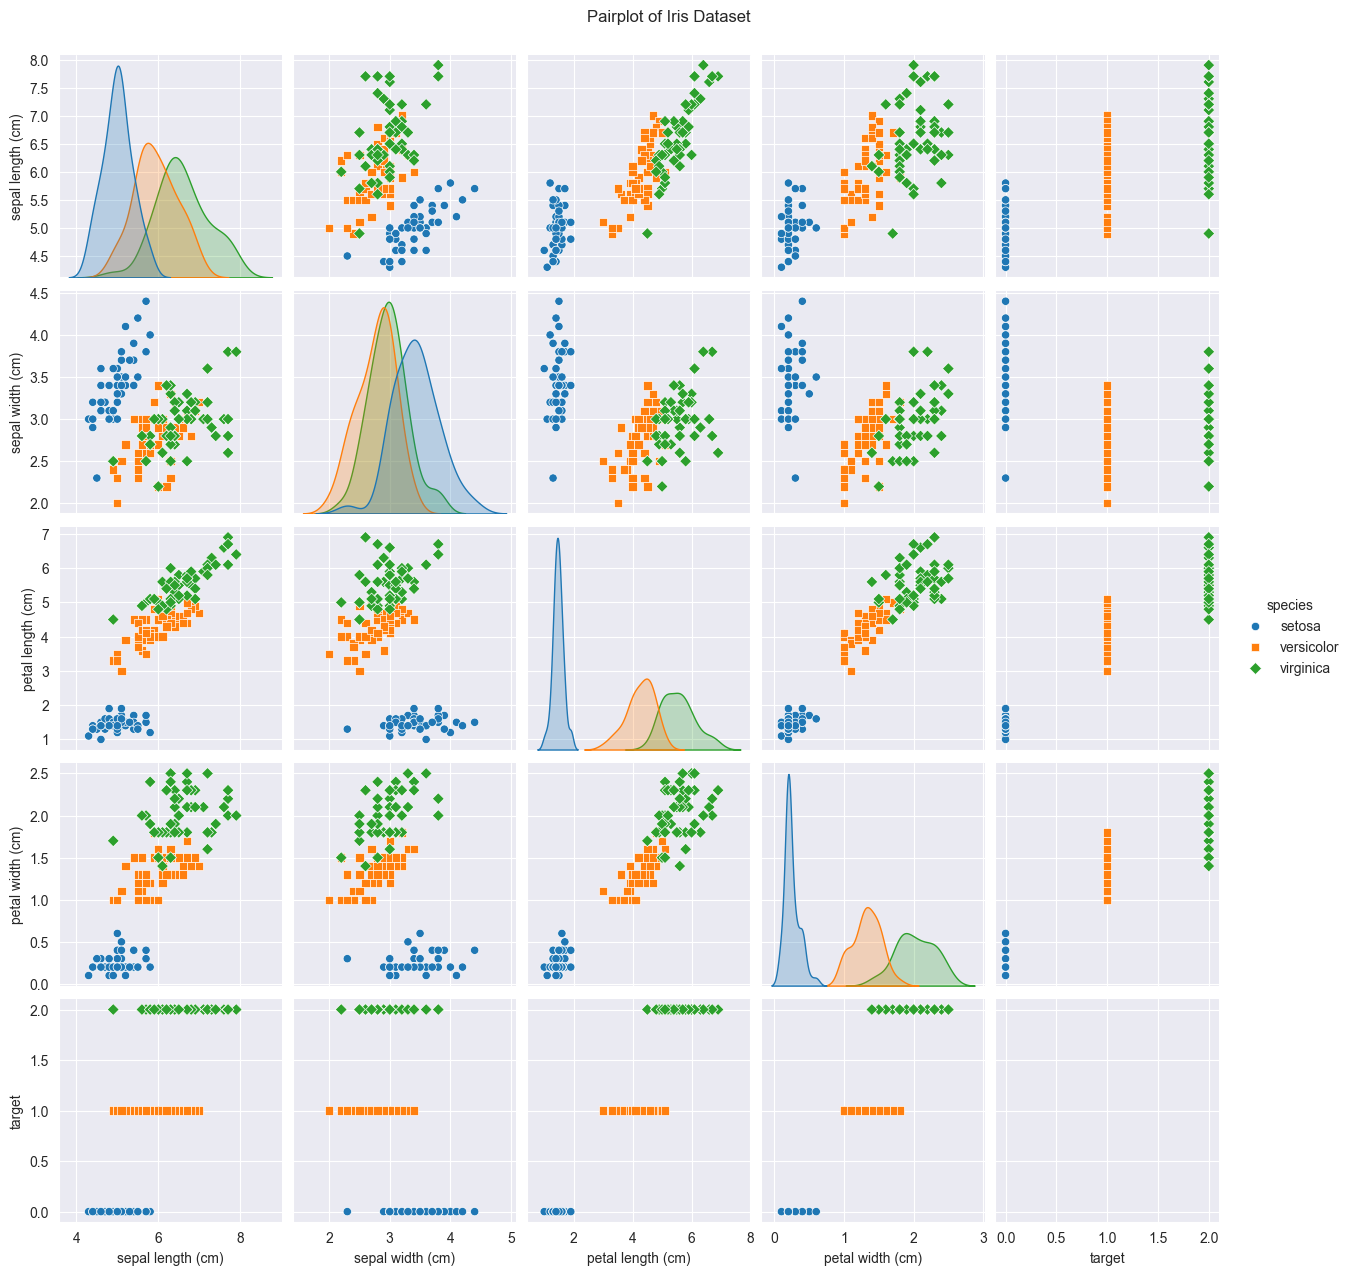

In [5]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

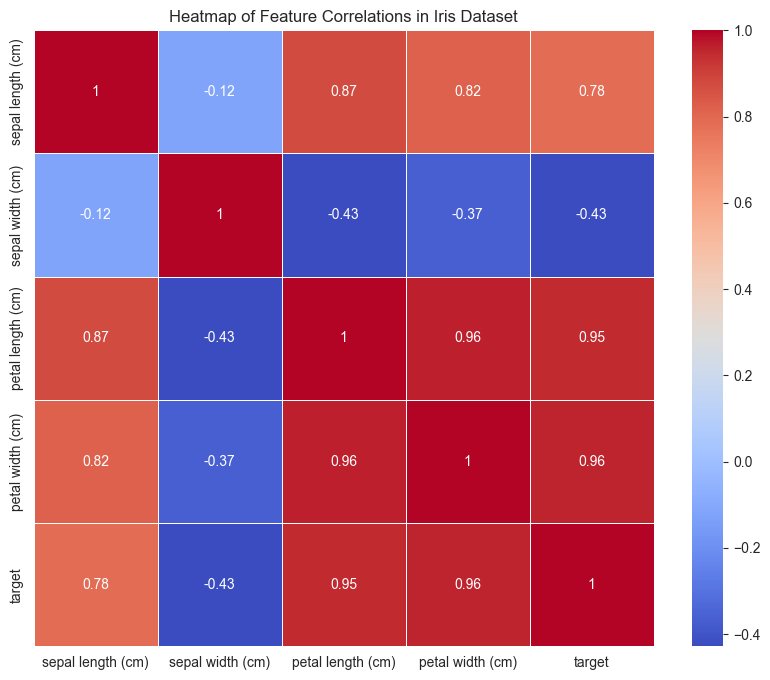

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = iris_df.drop(columns=['species']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations in Iris Dataset')
plt.show()

Now that we have overall information of what our dataset looks like, lets start implementing our own model.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
class Node:
    def __init__(self, feature: int = None, threshold: float = None, left: 'Node' = None, right: 'Node' = None, value: int = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

`Node` is a class that will represent the nodes of our decision tree, and it will have several attributes as shown above. Let's learn what does attributes are.

- `feature`: The index of the feature used to split the data at this node. For internal nodes, this attribute indicates which feature (column) of the dataset is used for the decision. For leaf nodes, this attribute is `None`.

- `threshold`: The value of the feature that the data is compared against at this node. For internal nodes, this attribute specifies the value used to split the data into left and right branches. For leaf nodes, this attribute is `None`.

- `left`: The left child node. This attribute points to the left subtree, which contains the data points that satisfy the condition `feature <= threshold`. For leaf nodes, this attribute is `None`.

- `right`: The right child node. This attribute points to the right subtree, which contains the data points that satisfy the condition `feature > threshold`. For leaf nodes, this attribute is `None`.

- `value`: The predicted class for leaf nodes. This attribute holds the class label that is the majority class of the samples reaching the leaf. For internal nodes, this attribute is `None`.

- `is_leaf_node`: This method checks whether the node is a leaf node. It returns True if the value attribute is not `None` (indicating it's a leaf node), and False otherwise.

Now lets implement the tree using this Node class

In [9]:
class DecisionTree:
    def __init__(self, max_depth: int = None):
        self.max_depth = max_depth
        self.tree = None

    def get_params(self, deep=None):
        """
        Return parameters for this estimator.
        """
        return {"max_depth": self.max_depth}

    def set_params(self, **params):
        """
        Set the parameters of this estimator.
        """
        for key, value in params.items():
            setattr(self, key, value)
        return self
    
    @staticmethod
    def _gini(y: np.ndarray) -> float:
        """
        Calculate the Gini impurity for a list of labels.
        """
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def _information_gain(self, y: np.ndarray, y_left: np.ndarray, y_right: np.ndarray) -> float:
        """
        Calculate the information gain of a split.
        """
        p = float(len(y_left)) / len(y)
        return self._gini(y) - p * self._gini(y_left) - (1 - p) * self._gini(y_right)

    @staticmethod
    def _split(X: np.ndarray, y: np.ndarray, feature: int, threshold: float):
        """
        Split the dataset based on a feature and a threshold.
        """
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _best_split(self, X: np.ndarray, y: np.ndarray):
        """
        Find the best split for the dataset.
        """
        best_feature, best_threshold, best_gain = None, None, -1
        n_features = X.shape[1]

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gain = self._information_gain(y, y_left, y_right)
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature, threshold

        return best_feature, best_threshold

    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """
        Build the decision tree recursively.
        """
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_labels == 1 or n_samples == 0 or (self.max_depth and depth >= self.max_depth):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feature, threshold = self._best_split(X, y)
        if feature is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        left_child = self._build_tree(X_left, y_left, depth + 1)
        right_child = self._build_tree(X_right, y_right, depth + 1)
        return Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the decision tree to the training data.
        """
        self.tree = self._build_tree(X, y)

    @staticmethod
    def _most_common_label(y: np.ndarray) -> signedinteger[Any]:
        """
        Find the most common label in a list of labels.
        """
        return np.bincount(y).argmax()

    def _traverse_tree(self, x: np.ndarray, node: Node) -> int:
        """
        Traverse the decision tree to make a prediction.
        """
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the labels for a dataset.
        """
        return np.array([self._traverse_tree(x, self.tree) for x in X])

Now let's create an instance of this model and train it using our dataset

In [10]:
decision_tree = DecisionTree(max_depth=3)
decision_tree.fit(X_train, y_train)

In [11]:
# Predict the class for the test set
y_pred = decision_tree.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=class_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Something seems off. Our model has `100%` accuracy on every class, that is, our model correctly guessed every single flower's species in the test set. Is this acceptable, or is our model overfitting? Let's inspect this further.

In [13]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree model
decision_tree = DecisionTree(max_depth=10)

# Perform 5-fold cross-validation
scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")


Cross-Validation Scores: [1.         0.96666667 0.86666667 0.93333333 0.73333333]
Mean Accuracy: 0.90
Standard Deviation: 0.09


What does this tell about our model? Here, we made use of a process called cross-validation.

### Cross-Validation
Cross-validation is a statistical technique used to evaluate and improve the performance of machine learning models. It involves partitioning the dataset into multiple subsets, training the model on some subsets while testing it on the remaining ones. The key objective of cross-validation is to assess how well the model generalizes to an independent dataset, i.e., how it performs on unseen data. Steps in `k-fold` are as follows:
- `Shuffle the dataset`: Randomly shuffle the dataset to ensure that the data is well mixed.
- `Split the dataset`: Divide the dataset into k equal-sized folds.
- `Train and validate`: For each fold, use k−1 folds to train the model and use the remaining one fold to test the model.
- `Calculate performance`: Compute the performance metric for each fold.
- `Aggregate results`: Average the performance metrics across all folds to obtain an overall performance estimate.

#### What about our cross-validation results?
- `Scores`: [1.0, 0.96666667, 0.86666667, 0.93333333, 0.73333333]
    - - These scores represent the accuracy of the model on five different folds
    - - The model achieved perfect accuracy (1.0) on one fold, indicating that it correctly classified all instances in that fold.
    - - The lowest accuracy (0.73333333) shows that the model made some errors on that particular fold.

- `Mean Accuracy`: 0.90
    - - A mean accuracy of 0.90 indicates that, on average, the model correctly classifies 90% of the instances.

- `Standard Deviation`: 0.09
    - - A standard deviation of 0.09 indicates that the accuracy scores vary by about 9% from the mean accuracy.

## Our model is up and working properly, now it is ready to be used with different datasets!

#### Thank you for attending today's workshop where we learned what `Decision Tree` algorithm is, how it works, and how it is implemented from scratch in Python. See you in the following weeks with new workshops on Machine Learning.